In [22]:
from IPython.display import display
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_blobs
%matplotlib inline

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, 
    cancer.target, 
    
    stratify=cancer.target, 
    # stratify: cancer.target데이터의 비율을 살펴서 split해줌으로써 지나치게 특정 라벨의 데이터만 들어가는 것을 사전에 방지한다.
    
    random_state=66
)

### Neural Networks (Deep Learning)
#### The Neural Network Model

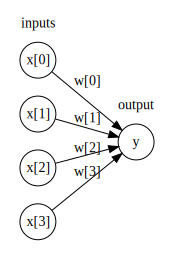

In [23]:
display(mglearn.plots.plot_logistic_regression_graph())

<img src="../image/IMG_0537.jpg"></img>

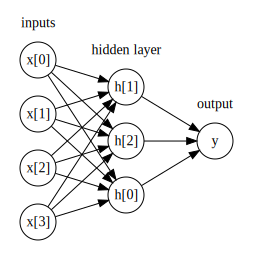

In [24]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0,0.5,'relu(x), tanh(x)')

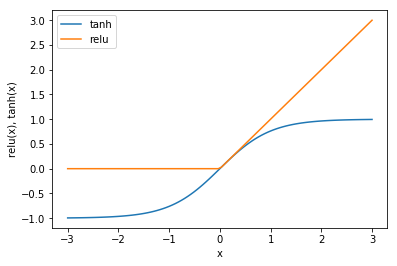

In [25]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

- 훨씬 더 복잡한 함수를 학습할 수 있게 함
- relu, tanh: 회귀
- sigmoid, softmax: 분류

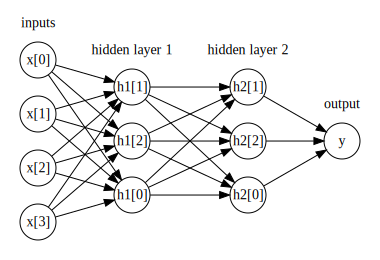

In [26]:
mglearn.plots.plot_two_hidden_layer_graph()

#### Tuning Neural Networks
- MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10], activation='tanh')
  - hidden_layer_sizes 매개변수가 없을 때 기본적인 신경망 구조
    - hidden layer 1개
    - hidden unit 개수: 100개 (== 직선의 개수)
      - hidden_layer_size = [100] : single layer
      - hidden_layer_size = [100, 100] : 2개의 hidden layer
  - activation
    - 기본값: relu
    - tanh
  - solver (=optimizer)
    - adam (default)
      - 데이터의 스케일에 민감 --> 정규화 (평균 0, 분산 1) 중요
    - lbfgs 
      - Newton Method의 일종
      - 대부분의 경우에서 안정적으로 동작
      - 대량의 데이터에 대한 많은 연산 필요
    - sgd
      - momentum 및 nesterov_momentum 매개변수 지정 필요
      - momentum
        - 새롭게 계산된 그레디언트에 대해 momentum 매개변수에 지정된 비율만큼만 반영 --> 관성 적용
      - nesterov_momentum
        - momentum 방식으로 구한 그레디언트를 이전 그레디언트로 가정
        - 한번 더 momentum 방식을 적용하여 새로운 그레디언트 계산

Text(0,0.5,'Feature 1')

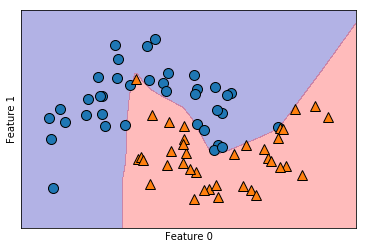

In [27]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

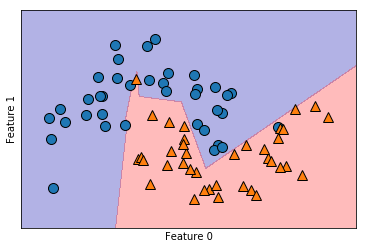

In [28]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

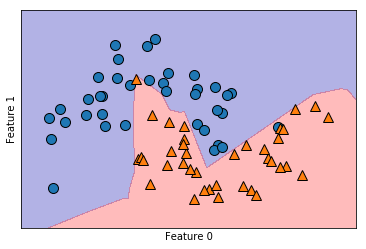

In [29]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

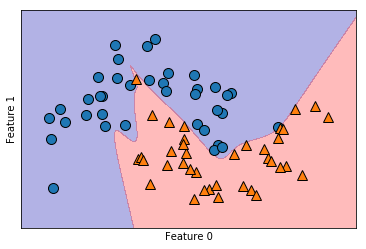

In [30]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity.
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- L2 규제 사용
  - alpha 매개변수 사용
    - 기본값: 0
    - 값이 커질수록 더 강한 규제를 가하는 것

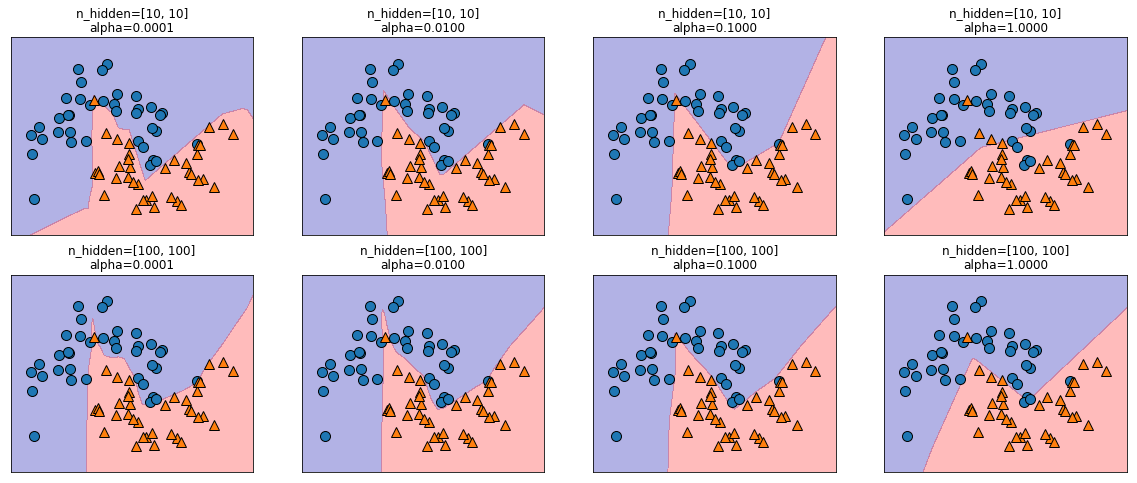

In [31]:
'''
신경망의 복잡도 제어 방법
- hidden layer의 unit의 개수
- hidden layer의 개수
- 규제(alpha)
'''
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

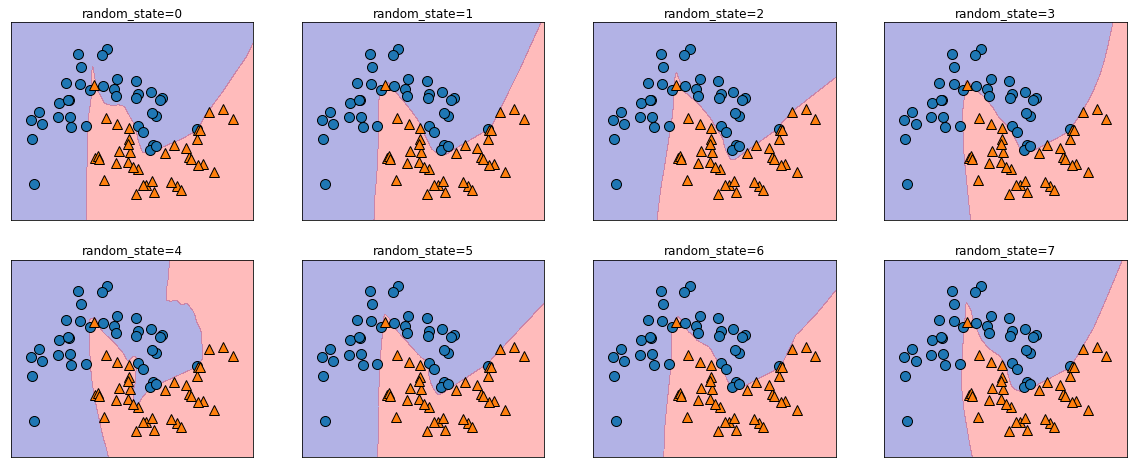

In [32]:
'''
같은 매개변수를 사용할 때, 초기값에 따라 성능이 달라질 수 있다
'''
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
    ax.set_title("random_state={}".format(i))

In [12]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   3.45400000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.74400000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   7.89500000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01   2.51200000e+02   4.25400000e+03
   2.22600000e-01   1.05800000e+00   1.25200000e+00   2.91000000e-01
   6.63800000e-01   2.07500000e-01]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.91
Accuracy on test set: 0.88


- 유방암 데이터에 대한 정규화
- 데이터의 스케일에 따라 성능이 달라진다.
- 평균은 0, 분산은 1이 되도록 조정

In [14]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


/Users/dohk/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


- adam optimizer에서 200번 정도의 iteration으로는 converge 시키기 부족함 --> max_iter 값 증가 필요
- 즉 학습의 반복횟수를 늘려야 함

In [15]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.972


- L2 규제 (일반화 성능 증대)
  - alpha = 1.0

In [16]:
mlp = MLPClassifier(max_iter=1000, alpha=1.0, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


- hidden layer 내에 존재하는 가중치 값 시각화
  - 작은 가중치를 지닌 특성이 덜 중요하다고 해석 가능
  - 밝은 색은 가중치가 높은 경우에 해당

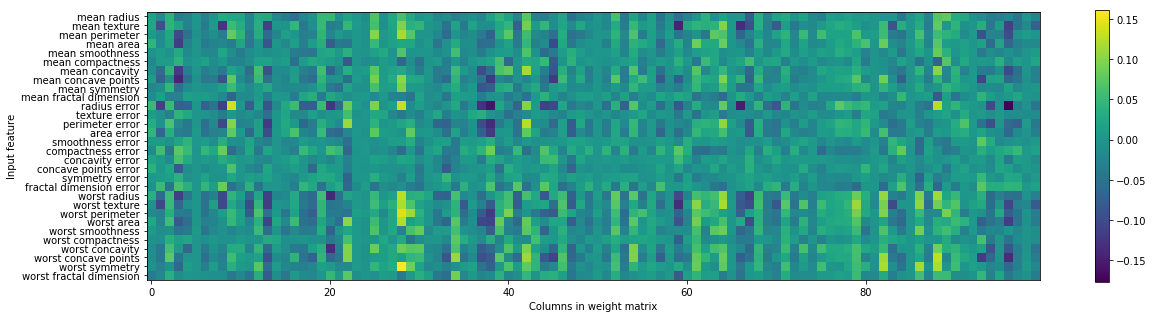

In [17]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

#### Strengths, weaknesses and parameters
- MLPClassifier의 한계
  - CNN, RNN 등의 복잡한 딥러닝 신경망 구성할 수 없음
  - 이러한 복잡한 딥러닝 신경망 구성은 keras 또는 tensorflow 활용 필요함
- 신경망의 장점
  - 많은 응용에서 최고의 모델로 평가받고 있음
  - 대량의 데이터에 내재된 정보를 잡아내면서 복잡한 모델 구성 가능
  - 충분한 연산 시간과 데이터를 주고 매개변수를 세심하게 조정하면 최고의 성능 발휘 가능
- 신견망의 단점
  - 학습 시간이 오래 걸림
  - 데이터 전처리 중요
    - 모든 특성이 동일한 범위를 지닌 데이터에 잘 작동
#### Estimating complexity in neural networks